# Initial Imports - DO NOT DELETE

## Special imports for cookiecutter

In [1]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 1
%aimport src.base

Loading environment variables


In [2]:
# DO NOT REMOVE This
%reload_ext autoreload

In [3]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

In [4]:
fis.test_base()

Base Module Imported

Testing local imports
In clean_data
In Model
In Visualize
In custom module


## Import libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

remote = True

In [6]:
localpath = '../data/raw/'
filename = 'zillow_data.csv'


# get the original data and save it immediately
if remote:
    print('Retrieving remote data')
    remotefileurl = 'https://raw.githubusercontent.com/learn-co-students/dc_ds_04_22_19/master/module_4/project/data/zillow_data.csv'
    raw_df = pd.read_csv(remotefileurl)
    
    # Save the raw data locally so we don't have to use the repo again.
    raw_df.to_csv(localpath+filename, index=False)
    
    #set remote to false so we don't always read from the repo
    remote=False
else:
    raw_df = pd.read_csv(localpath+filename)


zillow_df = raw_df.copy()

Retrieving remote data


# Business Question

>**"what are the top 5 best zipcodes for us to invest in?"** (e.g. the hottest)

## Approach:

1) Define the problem
    * understanding of the way the forecasts will be used
    * who requires the forecasts,
2) Gather information
    * may choose to use only the most recent data
    * But good statistical models will handle evolutionary changes in the system, dont just throw it away
3) Preliminary EDA
    * graph data
        * What patterns?
        * Significant trends
        * Seasonality
        * Business cycles
        * Outliers in the data
4) Choosing and fitting the models
    * Compare 2 or 3 models
5) Using and evaluating a forecasting model
    * Select a model
    * Estimate parameters

# Data Collection

## Initial Exploration

In [7]:
# This lets you see all of the columns in the df
# pd.options.display.max_columns = None

In [8]:
zillow_df.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


In [9]:
zillow_df.shape

(14723, 272)

### changing Dtypes

In [10]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [11]:
# 2014-07 to end is int64
zillow_df_int64 = zillow_df.iloc[:,7:].dtypes=='int64'
zillow_df_int64[zillow_df_int64]

2014-07    True
2014-08    True
2014-09    True
2014-10    True
2014-11    True
2014-12    True
2015-01    True
2015-02    True
2015-03    True
2015-04    True
2015-05    True
2015-06    True
2015-07    True
2015-08    True
2015-09    True
2015-10    True
2015-11    True
2015-12    True
2016-01    True
2016-02    True
2016-03    True
2016-04    True
2016-05    True
2016-06    True
2016-07    True
2016-08    True
2016-09    True
2016-10    True
2016-11    True
2016-12    True
2017-01    True
2017-02    True
2017-03    True
2017-04    True
2017-05    True
2017-06    True
2017-07    True
2017-08    True
2017-09    True
2017-10    True
2017-11    True
2017-12    True
2018-01    True
2018-02    True
2018-03    True
2018-04    True
dtype: bool

In [12]:
# Change 2014-07 to float64
for column in zillow_df.iloc[:,7:]:
    zillow_df[column] = zillow_df[column].astype(float)

In [13]:
# Every column that is not a date
zillow_df.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 7 columns):
RegionID      14723 non-null int64
RegionName    14723 non-null int64
City          14723 non-null object
State         14723 non-null object
Metro         13680 non-null object
CountyName    14723 non-null object
SizeRank      14723 non-null int64
dtypes: int64(3), object(4)
memory usage: 805.2+ KB


In [14]:
zillow_df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


### NA values

In [15]:
zillow_df.isna().sum().sort_values(ascending=False).head(10)

Metro      1043
1997-03    1039
1996-07    1039
1997-06    1039
1997-02    1039
1997-01    1039
1996-12    1039
1996-11    1039
1996-10    1039
1996-09    1039
dtype: int64

* Metro has 1043 missing values
* Lots of dates columns with missing values.  Could simply be that house wasn't arround then.  

#### NA values on non-date columns

In [16]:
# Show total NaN values in each column before dates start
zillow_df.iloc[:,:7].isna().sum().sort_values(ascending=False)

Metro         1043
SizeRank         0
CountyName       0
State            0
City             0
RegionName       0
RegionID         0
dtype: int64

In [17]:
# Metro is sometimes same as City, but mostly NOT
print('City column is same as Metro column in {} rows'.format(len(zillow_df[zillow_df['City']==zillow_df['Metro']])))
print('City column is NOT the same as Metro column in {} rows'.format(len(zillow_df[zillow_df['City']!=zillow_df['Metro']])))


City column is same as Metro column in 2756 rows
City column is NOT the same as Metro column in 11967 rows


* No solution yet for how to deal with Metro column NaN values

#### Dropping rows with limited data
* NB that this will eliminate those rows from being in contention to being 'hottest spot'

In [18]:
rows_to_drop = zillow_df[zillow_df['1996-04'].isna()].size
print('{} rows will be dropped'.format(rows_to_drop))

282608 rows will be dropped


In [19]:
zillow_df = zillow_df[~zillow_df['1996-04'].isna()]

### Engineer new column for state_city (including splitting into 2 dfs then recombining)

In [20]:
# Split the df in 2 halves
zillow_df_1st_half = zillow_df.iloc[:,:7]
zillow_df_2nd_half = zillow_df.iloc[:,7:]

# add engineered column to 1st half
zillow_df_1st_half['state_city'] = zillow_df_1st_half['State'].map(str) + "_" + zillow_df_1st_half['City']

# add 2nd half back to 1st half
zillow_df = pd.concat([zillow_df_1st_half, zillow_df_2nd_half],axis=1,sort=False)

### Sort table by State then City

In [21]:
zillow_df.sort_values('state_city', ascending=True, inplace=True)
zillow_df.head(15)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,state_city,1996-04,1996-05,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5597,100233,99515,Anchorage,AK,Anchorage,Anchorage,5598,AK_Anchorage,178500.0,178100.0,...,404400.0,403900.0,403900.0,404200.0,404500.0,405300.0,406200.0,405900.0,403300.0,400700.0
6262,100234,99516,Anchorage,AK,Anchorage,Anchorage,6263,AK_Anchorage,183900.0,184200.0,...,491700.0,491300.0,490400.0,490100.0,491000.0,492100.0,493200.0,495500.0,497500.0,497400.0
8968,100265,99567,Anchorage,AK,Anchorage,Anchorage,8969,AK_Anchorage,147200.0,147900.0,...,407300.0,410000.0,413200.0,417000.0,421400.0,424400.0,426500.0,426400.0,423100.0,419100.0
6327,100235,99517,Anchorage,AK,Anchorage,Anchorage,6328,AK_Anchorage,121700.0,122100.0,...,332300.0,330800.0,331200.0,332700.0,334200.0,335100.0,335400.0,335000.0,334100.0,333200.0
2184,100226,99507,Anchorage,AK,Anchorage,Anchorage,2185,AK_Anchorage,130500.0,131100.0,...,364500.0,364600.0,364600.0,364100.0,364700.0,365200.0,365400.0,365100.0,363600.0,361800.0
5512,100220,99501,Anchorage,AK,Anchorage,Anchorage,5513,AK_Anchorage,118000.0,118200.0,...,359800.0,366200.0,372200.0,374700.0,377200.0,380000.0,382400.0,379700.0,372800.0,367300.0
4960,100221,99502,Anchorage,AK,Anchorage,Anchorage,4961,AK_Anchorage,142500.0,142700.0,...,350900.0,351400.0,351800.0,351900.0,352200.0,353200.0,355400.0,356700.0,355500.0,353800.0
4340,100274,99577,Anchorage,AK,Anchorage,Anchorage,4341,AK_Anchorage,147000.0,148400.0,...,405100.0,405800.0,406500.0,407600.0,409600.0,412000.0,414600.0,414900.0,412300.0,409300.0
12661,100282,99587,Anchorage,AK,Anchorage,Anchorage,12662,AK_Anchorage,170600.0,169300.0,...,428200.0,426300.0,423200.0,422700.0,425100.0,427600.0,428000.0,429000.0,429300.0,429100.0
2872,100227,99508,Anchorage,AK,Anchorage,Anchorage,2873,AK_Anchorage,117900.0,118200.0,...,310000.0,311300.0,311800.0,312800.0,314900.0,317100.0,319900.0,321100.0,318400.0,314600.0


In [24]:
zillow_df.groupby('state_city', as_index=True).count()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
state_city,,,,,,,,,,,,,,,,,,,,,
AK_Anchorage,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
AK_Fairbanks,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
AK_Homer,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AK_Juneau,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AK_Kenai,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AK_Ketchikan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AK_Knik-Fairview,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AK_Kodiak,1,1,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AK_North Pole,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### mean values when grouped by state_city

In [55]:
# Group by sum of each state_city, then transposed
zillow_df = zillow_df.groupby('state_city', as_index=True).sum().T
zillow_df.head()

state_city,AK_Anchorage,AK_Fairbanks,AK_Homer,AK_Juneau,AK_Kenai,AK_Ketchikan,AK_Knik-Fairview,AK_Kodiak,AK_North Pole,AK_Palmer,...,WY_Gillette,WY_Green River,WY_Kemmerer,WY_Lander,WY_Laramie,WY_Lyman,WY_Powell,WY_Riverton,WY_Rock Springs,WY_Worland
RegionID,1303098.0,301147.0,100289.0,100459.0,100297.0,100478.0,422747.0,100301.0,100380.0,100326.0,...,187950.0,94011.0,94028.0,93943.0,187744.0,94013.0,93930.0,93936.0,94000.0,93914.0
RegionName,1293822.0,299122.0,99603.0,99801.0,99611.0,99901.0,99623.0,99615.0,99705.0,99645.0,...,165434.0,82935.0,83101.0,82520.0,164142.0,82937.0,82435.0,82501.0,82901.0,82401.0
SizeRank,76435.0,18981.0,7570.0,4107.0,7191.0,7294.0,8161.0,7498.0,5515.0,4169.0,...,11003.0,7445.0,12586.0,7568.0,11428.0,12712.0,7667.0,5505.0,3745.0,9194.0
1996-04,1812400.0,301600.0,114100.0,166800.0,110700.0,117100.0,116300.0,131300.0,101900.0,119600.0,...,290400.0,130600.0,123500.0,158400.0,305800.0,130600.0,158500.0,126600.0,130500.0,123100.0
1996-05,1816800.0,303300.0,115000.0,166200.0,111100.0,117200.0,117100.0,132400.0,102900.0,120700.0,...,290400.0,130700.0,123500.0,158400.0,306000.0,130700.0,158600.0,126700.0,130600.0,123000.0


### Remove unnecessary rows

In [56]:
# Take out top 3 rows
zillow_df = zillow_df.iloc[3:,:]

In [61]:
zillow_df.head()

state_city,AK_Anchorage,AK_Fairbanks,AK_Homer,AK_Juneau,AK_Kenai,AK_Ketchikan,AK_Knik-Fairview,AK_Kodiak,AK_North Pole,AK_Palmer,...,WY_Gillette,WY_Green River,WY_Kemmerer,WY_Lander,WY_Laramie,WY_Lyman,WY_Powell,WY_Riverton,WY_Rock Springs,WY_Worland
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,1812400.0,301600.0,114100.0,166800.0,110700.0,117100.0,116300.0,131300.0,101900.0,119600.0,...,290400.0,130600.0,123500.0,158400.0,305800.0,130600.0,158500.0,126600.0,130500.0,123100.0
1996-05-01,1816800.0,303300.0,115000.0,166200.0,111100.0,117200.0,117100.0,132400.0,102900.0,120700.0,...,290400.0,130700.0,123500.0,158400.0,306000.0,130700.0,158600.0,126700.0,130600.0,123000.0
1996-06-01,1820800.0,304900.0,116000.0,165400.0,111400.0,117300.0,117800.0,133600.0,103800.0,121800.0,...,290300.0,130800.0,123400.0,158400.0,305800.0,130700.0,158600.0,126700.0,130600.0,123000.0
1996-07-01,1824200.0,306500.0,116900.0,164400.0,111800.0,117400.0,118500.0,134800.0,104700.0,122800.0,...,290000.0,130700.0,123100.0,158300.0,305600.0,130600.0,158400.0,126600.0,130600.0,122800.0
1996-08-01,1827800.0,308000.0,117900.0,163500.0,112300.0,117500.0,119200.0,136000.0,105400.0,123700.0,...,289800.0,130700.0,122900.0,158200.0,305300.0,130500.0,158300.0,126500.0,130600.0,122600.0


### Convert to DateTime and reindex

In [57]:
# Add in index
zillow_df.reset_index(inplace=True)

# Rename 'date' column (maybe unnecessary)
zillow_df.rename(index=str, columns={"index": "date"}, inplace=True)

# Convert 'date' to datetime
zillow_df['date'] = pd.to_datetime(zillow_df['date'], format='%Y/%m/%d')

# Make 'date' index again
zillow_df.set_index('date', inplace=True)

### Downsampling from monthly to quarterly?????

In [58]:
# zillow_df_freq_mean = zillow_df.resample('QS').mean()

In [ ]:
zillow_chicago.resample('QS')  # This will change it to quarterly

## Visualizations

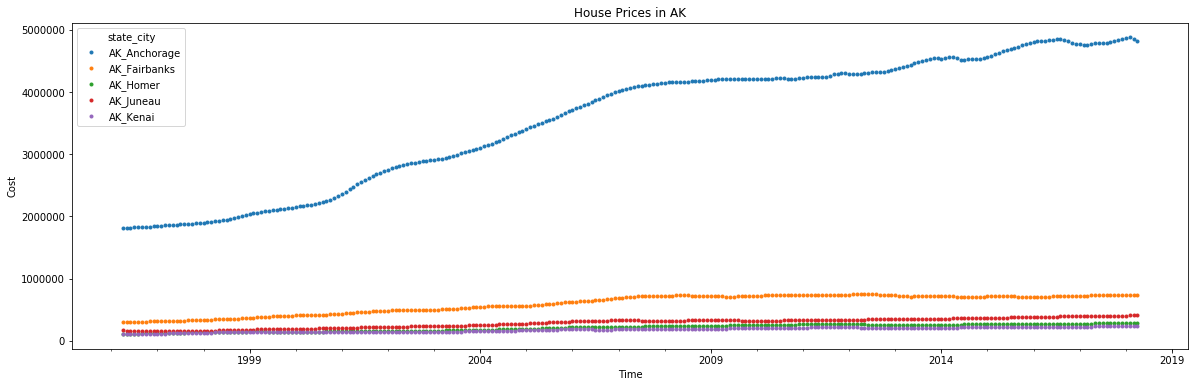

In [59]:
rows_to_show = 5
zillow_df.iloc[:,:rows_to_show].plot(figsize = (20,6), style = ".") #changes continuous line to dots, as line can mislead and suggest its continous data

state = 'AK'
plt.title('House Prices in {}'.format(state));
plt.ylabel('Cost')
plt.xlabel('Time')
plt.show()

* Perhaps change them to relative values, i.e. (year-year1)/year1*100

In [60]:
# change to relative values
zillow_df_relative
for column in list(zillow_df.columns):
    col_year_1 = zillow_df[column][0]
    for row in rows:
    zillow_df_relative[column] = ()

IndentationError: expected an indented block (<ipython-input-60-1ed11931dc13>, line 6)

In [98]:
def detrend(TS, column):
        '''Auto selecting the '''
        p_values = []
        
        decomposition=seasonal_decompose(TS[column].dropna())
        residuals = decomposition.resid
        dftest = adfuller(residuals.dropna())
        dfoutput1 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput1['Critical Values (%s)' %key] = value
        p_values.append(dfoutput1[1])
        
    
        data_diff1 = TS[column].diff(periods=1)
        dftest = adfuller(data_diff1.dropna())
        dfoutput2 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput2['Critical Values (%s)' %key] = value
        p_values.append(dfoutput2[1])
    
        data_diff2 = TS[column].apply(lambda x: np.log(x)) - TS[column].apply(lambda x: np.log(x)).shift(1)
        dftest = adfuller(data_diff2.dropna())
        dfoutput3 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput3['Critical Values (%s)' %key] = value
        p_values.append(dfoutput3[1])
        

        temp_diff = TS[column].apply(lambda x: np.log(x)) - TS[column].apply(lambda x: np.log(x)).shift(1)
        data_diff3 = temp_diff - temp_diff.shift(12)  
        dftest = adfuller(data_diff3.dropna())
        dfoutput4 = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for key, value in dftest[4].items():
            dfoutput4['Critical Values (%s)' %key] = value
        p_values.append(dfoutput4[1])
        
        if np.argmin(p_values)==0:
            residuals.plot(figsize=(20,6))
            plt.title('{} Seasonal Decomposition'.format(column))
            plt.show();
            print(dfoutput1)
        
        elif np.argmin(p_values)==1:
            data_diff1.plot(figsize=(20,6))
            plt.title('{} First Difference'.format(column))
            plt.show();
            print(dfoutput2)
            
        elif np.argmin(p_values)==2:
            data_diff1.plot(figsize=(20,6))
            plt.title('{} Log First Difference'.format(column))
            plt.show();
            print(dfoutput3)
        
        elif np.argmin(p_values)==3:
            data_diff1.plot(figsize=(20,6))
            plt.title('{} Log Seasonal First Difference'.format(column))
            plt.show();
            print(dfoutput4)

In [99]:
list1 = [1,4,6,4,6,8,98,5,4,3,56,78,5,7]

In [109]:
for i in list1:
    if list1[i]>5:
        plist.append(i)
print(np.array)
print(len(np.array(list1[list1>5])))

<built-in function len>


TypeError: '>' not supported between instances of 'list' and 'int'

# Seaborn Visuals

In [113]:
zillow_chicago = pd.read_csv('../data/processed/zillow_chicago_1996_to_2018')
zillow_chicago.set_index('date', inplace=True)

In [ ]:
sns.scatterplot()

In [141]:
type(zillow_chicago.columns[0])

str

In [145]:
zillow_df = pd.read_csv('../data/processed/zillow_chicago_1996_to_2018')
zillow_df[200]

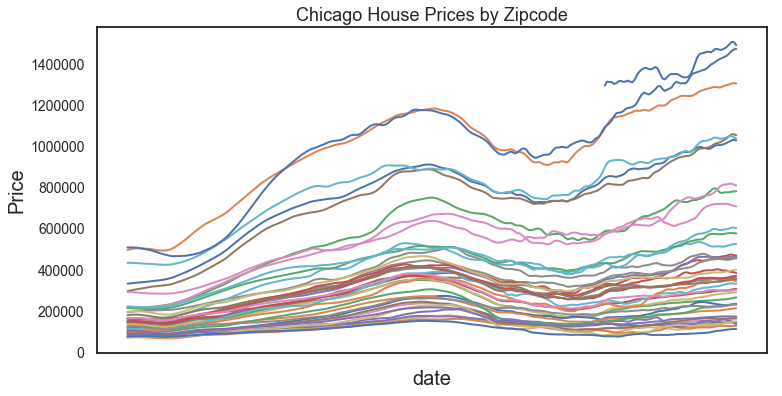

In [136]:
ax = zillow_chicago.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Chicago House Prices by Zipcode')
ax.legend().remove()

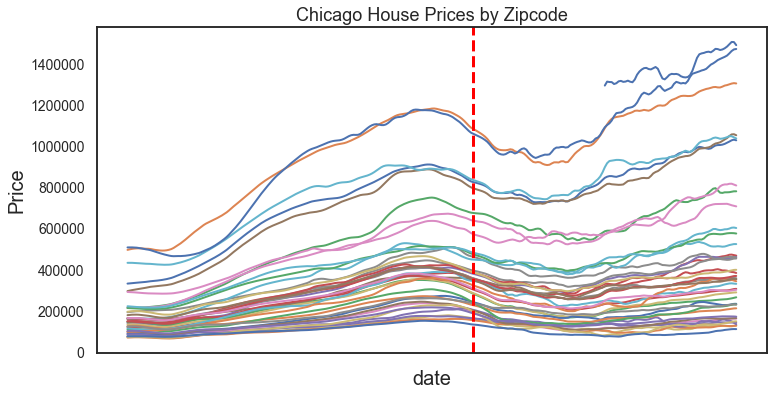

In [144]:
ax = chicago.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('date', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Chicago House Prices by Zipcode')
ax.legend().remove()

x = 150
ymin = 0
ymax = 1000000
color = 'red'
label = 'Financial Crisis'
plt.axvline(x=x, ymin=ymin, ymax=ymax, ls= "--", lw=3, color=color, label=label)

In [120]:
# Plotting with Seaborn

# Set figure size and nice layout
sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")

# Plot
data = zillow_chicago
as_fig = sns.lineplot(data=data, height=5, aspect=2, palette='bright');

# Title
title = 'Chicago House Prices by Zipcode'
as_fig.set(title=title)

# Axis Labels
xlabel = 'Date'
ylabel = 'Price'
as_fig.set_xlabels(xlabel)
as_fig.set_ylabels(ylabel)

# Remove legend
plt.legend().remove()

# Add financial crash 2008
x = 2008
ymin = 0
ymax = 1000000
color = 'red'
label = 'Financial Crisis'
plt.axvline(x=x, ymin=ymin, ymax=ymax, ls= "--", lw=3, color=color, label=label)



ValueError: These `style` levels are missing dashes: {'60643', '60653', '60640', '60616', '60620', '60634', '60641', '60614', '60647', '60631', '60613', '60657', '60656', '60633', '60622', '60659', '60625', '60652', '60646', '60639', '60638', '60654', '60642', '60651', '60615', '60618', '60645', '60649', '60630', '60655', '60619', '60660', '60629', '60632', '60626'}

# Conclusion

## Findings

## Limitations

* We have extrapolated trends and seasonal patterns in the information available on price.  
    * We have not included factors that affect its behaviour, such as changes in the housing market overall or a dramatic change in demand or supply (e.g. a large corporation moving to town and employees needing housing, or a sudden exodus from a town leaving many homes on the market)
* Predictions of the future price are based on past values of price, not on external variables that might affect the pricing system.  For this reason an "error" term is included to allow for this random variation and the effect of relevant variables which are not included in our system
* Based on the resources and data available, a time series model was used instead of a explanatory model
    * extremely difficult to measure the relationships that are assumed to govern price's behaviour.
    * Our focus was to predict what will happen to price, not to know why it happens.
* Forecasts more into the future are less reliable

In [28]:
temp_df = pd.read_csv('../data/processed/zillow_chicago_df.csv').iloc[:,1:]
temp_df

,date,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
0,1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1,1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
2,1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
3,1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
4,1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0
5,1996-09-01,339500.0,505700.0,217200.0,122000.0,142200.0,308400.0,94200.0,149400.0,77500.0,...,103100.0,212600.0,163500.0,103700.0,182900.0,166300.0,125400.0,200500.0,219600.0,78400.0
6,1996-10-01,340400.0,505300.0,217500.0,121500.0,141300.0,310200.0,93500.0,149100.0,77200.0,...,103500.0,212000.0,162800.0,102800.0,181800.0,165400.0,124200.0,199500.0,218700.0,78300.0
7,1996-11-01,341300.0,504200.0,217900.0,120900.0,140100.0,311800.0,92500.0,148500.0,76600.0,...,103800.0,211400.0,162100.0,101600.0,180400.0,164300.0,122900.0,198000.0,218100.0,78100.0
8,1996-12-01,342600.0,503600.0,218600.0,120500.0,139000.0,314100.0,91600.0,148100.0,76200.0,...,104200.0,211000.0,161500.0,100500.0,179100.0,163400.0,121600.0,196600.0,217800.0,77900.0
9,1997-01-01,344400.0,503400.0,219700.0,120300.0,138000.0,316600.0,90800.0,147900.0,75800.0,...,104800.0,210900.0,161100.0,99500.0,177900.0,162500.0,120400.0,195400.0,217800.0,77700.0


In [32]:
temp_df.set_index('date', inplace=True)
temp_df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,435200.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,435200.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,435100.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,434600.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,433900.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


In [33]:
columns = list(temp_df.columns)
type(columns[4])

In [35]:
type(columns[4])

str

In [36]:
temp_df.iloc[:,0]

date
1996-04-01     334200.0
1996-05-01     335400.0
1996-06-01     336500.0
1996-07-01     337600.0
1996-08-01     338500.0
1996-09-01     339500.0
1996-10-01     340400.0
1996-11-01     341300.0
1996-12-01     342600.0
1997-01-01     344400.0
1997-02-01     345700.0
1997-03-01     346700.0
1997-04-01     347800.0
1997-05-01     349000.0
1997-06-01     350400.0
1997-07-01     352000.0
1997-08-01     353900.0
1997-09-01     356200.0
1997-10-01     358800.0
1997-11-01     361800.0
1997-12-01     365700.0
1998-01-01     370200.0
1998-02-01     374700.0
1998-03-01     378900.0
1998-04-01     383500.0
1998-05-01     388300.0
1998-06-01     393300.0
1998-07-01     398500.0
1998-08-01     403800.0
1998-09-01     409100.0
                ...    
2015-11-01     948200.0
2015-12-01     951000.0
2016-01-01     952500.0
2016-02-01     958600.0
2016-03-01     966200.0
2016-04-01     970400.0
2016-05-01     973900.0
2016-06-01     974700.0
2016-07-01     972600.0
2016-08-01     974300.0
2016-09-01 

In [38]:
# Import adfuller
from statsmodels.tsa.stattools import adfuller
def stationarity_check(TS, column):
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column]) # change the passengers column as required
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

    return None

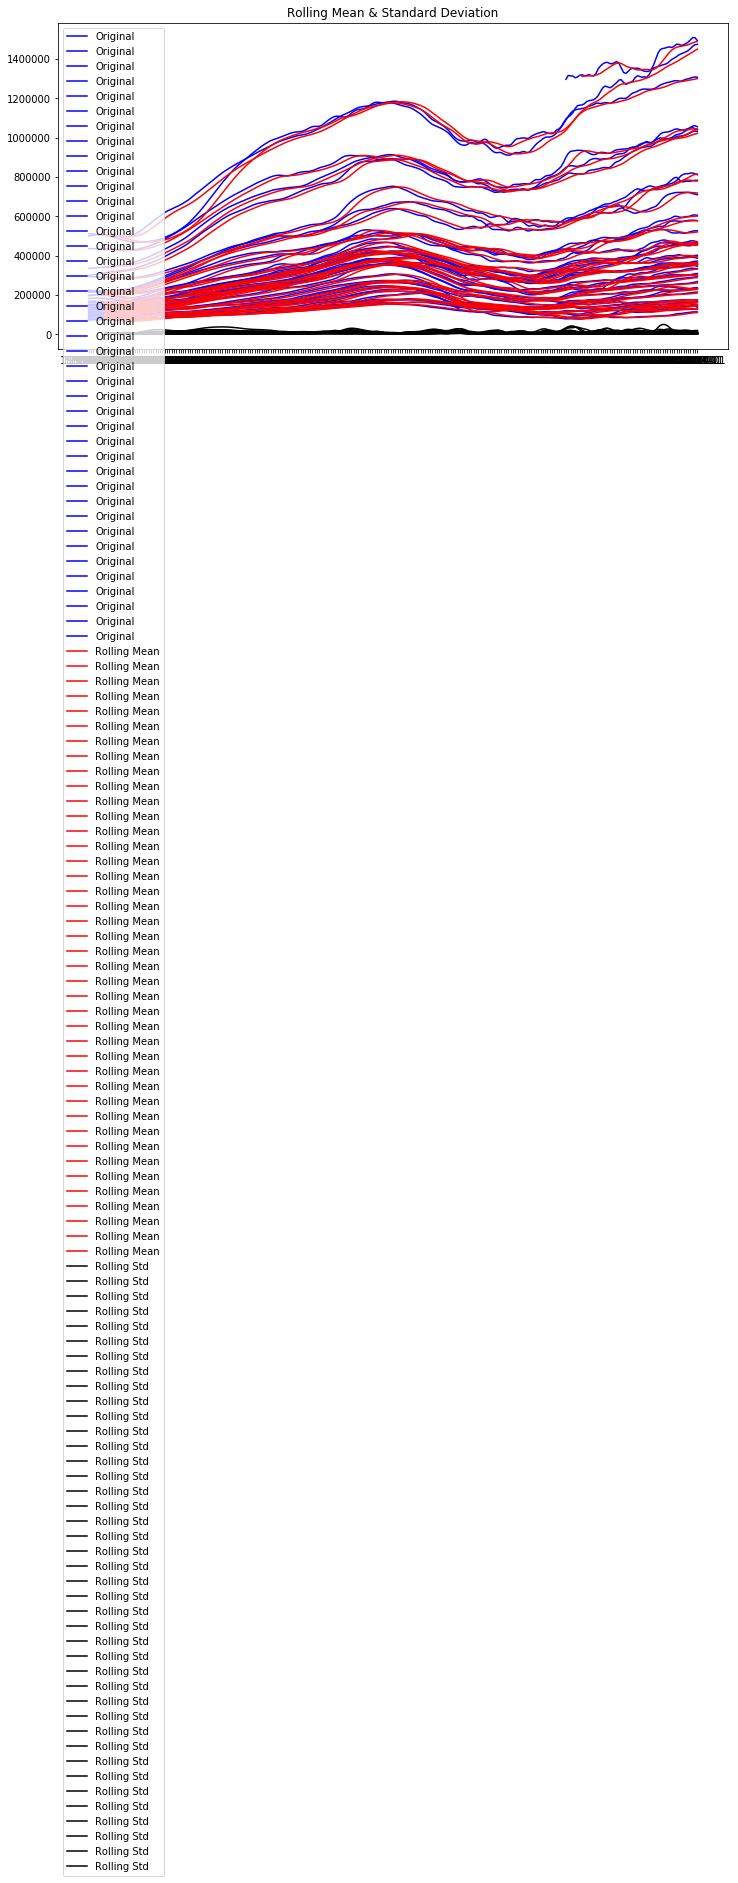

Results of Dickey-Fuller Test:
Test Statistic                  -2.284012
p-value                          0.177176
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [43]:
stationarity_check(temp_df,'60647')

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,435200.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,435200.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,435100.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,434600.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,433900.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0
1996-09-01,339500.0,505700.0,217200.0,122000.0,142200.0,308400.0,94200.0,149400.0,77500.0,433100.0,...,103100.0,212600.0,163500.0,103700.0,182900.0,166300.0,125400.0,200500.0,219600.0,78400.0
1996-10-01,340400.0,505300.0,217500.0,121500.0,141300.0,310200.0,93500.0,149100.0,77200.0,432200.0,...,103500.0,212000.0,162800.0,102800.0,181800.0,165400.0,124200.0,199500.0,218700.0,78300.0
1996-11-01,341300.0,504200.0,217900.0,120900.0,140100.0,311800.0,92500.0,148500.0,76600.0,431200.0,...,103800.0,211400.0,162100.0,101600.0,180400.0,164300.0,122900.0,198000.0,218100.0,78100.0
1996-12-01,342600.0,503600.0,218600.0,120500.0,139000.0,314100.0,91600.0,148100.0,76200.0,430700.0,...,104200.0,211000.0,161500.0,100500.0,179100.0,163400.0,121600.0,196600.0,217800.0,77900.0


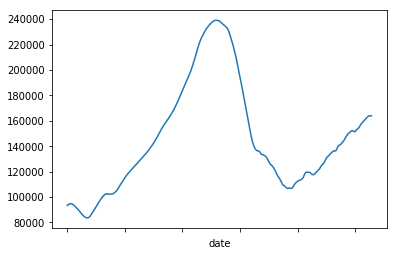

In [46]:
temp_df['60629'].plot()

In [52]:
bool_test = True

In [53]:
if bool_test==True:
    print('yes')

yes


In [60]:
def stationarity_check(TS, column, plot_mean=True, plot_std=True):
    '''Outputs a plot of the Rolling Mean and prints results of the Dickey-Fuller Test
       TS: Time Series, this is the dataframe from which you are pulling your information
       column: This is the column within the TS that you are interested in, e.g. the zipcode or stock ticker'''
    # Calculate rolling statistics
    rolmean = TS[column].rolling(window = 8, center = False).mean()
    rolstd = TS[column].rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS[column]) # change the passengers column as required
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS[column], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for {}'.format(column))
    plt.show(block=False)
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value {}'.format(key)] = value
    print (dfoutput)

    return None

In [67]:
temp_df['2012':]

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,737700.0,928900.0,565300.0,284100.0,293000.0,737600.0,108400.0,326500.0,108900.0,765200.0,...,205900.0,401200.0,263400.0,129200.0,262900.0,218600.0,187800.0,300000.0,386000.0,87400.0
2012-02-01,733700.0,923900.0,555400.0,282100.0,289900.0,734300.0,107400.0,321700.0,106600.0,764800.0,...,202400.0,397000.0,260200.0,127800.0,259700.0,216100.0,185600.0,297700.0,381000.0,86500.0
2012-03-01,734000.0,925300.0,549300.0,278500.0,289700.0,734700.0,106800.0,318700.0,104500.0,764100.0,...,200500.0,396500.0,258800.0,127000.0,257600.0,214100.0,184200.0,297200.0,379500.0,85500.0
2012-04-01,740300.0,938100.0,552400.0,276200.0,292900.0,739700.0,107100.0,319500.0,104000.0,770700.0,...,200400.0,399000.0,261100.0,127300.0,258000.0,213600.0,184100.0,299100.0,381100.0,85000.0
2012-05-01,744600.0,951900.0,555300.0,275600.0,296700.0,742500.0,107000.0,321300.0,105100.0,780400.0,...,200100.0,400200.0,262900.0,127100.0,258600.0,213800.0,183700.0,300500.0,381200.0,84900.0
2012-06-01,750500.0,965400.0,551000.0,276200.0,301200.0,745400.0,106800.0,323200.0,107400.0,786300.0,...,200800.0,401100.0,262000.0,126800.0,258900.0,214900.0,183400.0,301600.0,384900.0,85800.0
2012-07-01,760400.0,975900.0,545300.0,277700.0,305800.0,749700.0,107000.0,323300.0,109500.0,785600.0,...,205100.0,403600.0,259700.0,126500.0,258200.0,216000.0,184100.0,303500.0,393200.0,85900.0
2012-08-01,771800.0,984500.0,546500.0,281400.0,310600.0,756200.0,108100.0,323400.0,111900.0,786600.0,...,209900.0,407700.0,258500.0,126200.0,258100.0,217000.0,185100.0,307500.0,400800.0,85500.0
2012-09-01,780600.0,994100.0,552300.0,285600.0,315800.0,762400.0,109700.0,325100.0,114000.0,794400.0,...,215100.0,412000.0,258700.0,126900.0,259700.0,218300.0,186000.0,311100.0,406500.0,85500.0


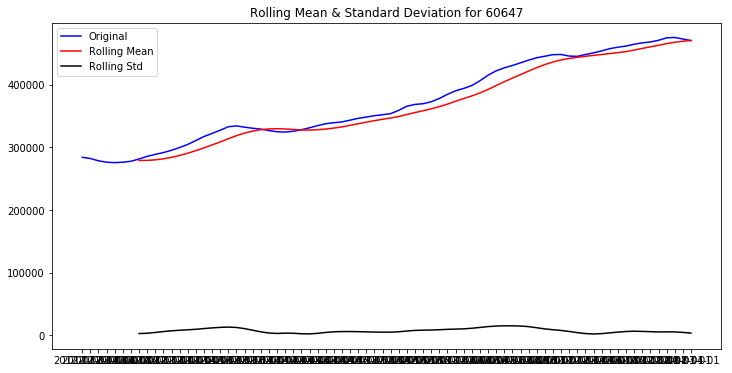

Results of Dickey-Fuller Test:
Test Statistic                 -0.906524
p-value                         0.785816
#Lags Used                      6.000000
Number of Observations Used    69.000000
Critical Value 1%              -3.528890
Critical Value 5%              -2.904440
Critical Value 10%             -2.589656
dtype: float64


TypeError: 'NoneType' object is not subscriptable

In [69]:
stationarity_check(temp_df['2012':], '60647')

In [ ]:
p_values_list = 

In [78]:
!ls ../data/processed/

zillow_chicago_1996_to_2018 zillow_chicago_df.csv


In [81]:
zillow_df = pd.read_csv('../data/processed/zillow_chicago_1996_to_2018')
zillow_df.set_index('date', inplace=True)

In [82]:
zillow_df.head()

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,435200.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,435200.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,435100.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0
1996-07-01,337600.0,504600.0,217000.0,122700.0,143300.0,304700.0,94800.0,149700.0,77700.0,434600.0,...,102300.0,213900.0,164600.0,104700.0,183500.0,167100.0,126500.0,200800.0,221500.0,78500.0
1996-08-01,338500.0,505500.0,217100.0,122400.0,142900.0,306600.0,94700.0,149700.0,77700.0,433900.0,...,102700.0,213200.0,164100.0,104400.0,183400.0,166900.0,126100.0,201000.0,220500.0,78500.0


In [84]:
def autocorrelation(df,column,periods_n=1):
    col = df[[str(column)]]
    col_shift = col.shift(periods_n)
    lag_n= pd.concat([col_shift, col], axis=1) # join col with col_shift
    lag_n.corr()
    lag_n.plot(figsize=(18,6))
    # Plot different periods against each other (high value = high correlation)
        # Might want to change to col_diff instead of col_shift
    plt.figure(figsize=(12,5))
    pd.plotting.autocorrelation_plot(col_shift);
        # col_diff
    col_diff = df_diff[[str(column)]].dropna()
    plt.figure(figsize=(12,5))
    pd.plotting.autocorrelation_plot(df_diff)

NameError: name 'df_diff' is not defined

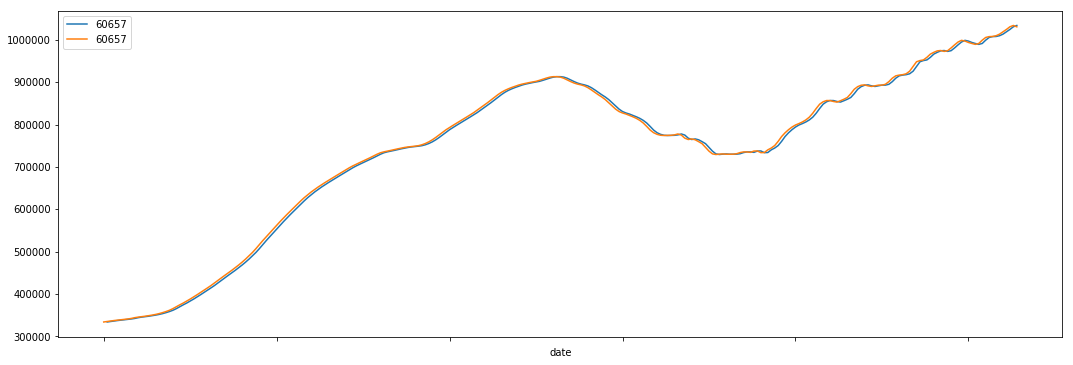

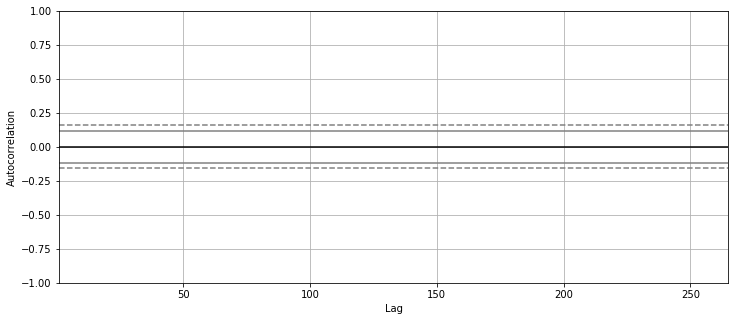

In [85]:
autocorrelation(zillow_df,60657)

In [91]:
!cd ../src
from  import detrend

ModuleNotFoundError: No module named 'detrend'

In [92]:
from src.clean_data import test_clean_data

In [94]:
test_clean_data()

In clean_data


In [95]:
from src.detrend import detrend

NameError: name 'null' is not defined

In [96]:
from src.custom import *

In [97]:
test_custom()

In custom module


In [ ]:
detrend()

Omer Comments:
* break down the big function into several smaller functions
* go back to months, so we have > 50 observations
* how do we compare vs the baseline model, the moving average model.
* cherry pick a few zipcodes
    * can eliminate some from model if we're unable to make them stationary, and they dont really fit our model
    * If we decide to drop based on a model...(cant remember)
within time constraints of project, we tried different methods to stabilize some zipcodes, but were unable to do so.  We therefore chose 
* prediction intervals to include (need to find the code for this)
* overfitting if the model becomes more complex.
* can do difference on the difference. 
    * but be careful not to over difference (starts going below the negative confidence interval on ACF

# Evaluation Graphs

In [2]:
!ls ../data/processed/

zillow_chicago_1996_to_2018 zillow_chicago_df.csv


In [49]:
# import the csv
zillow_chicago = pd.read_csv('../data/processed/zillow_chicago_1996_to_2018')

# Convert to datetime
zillow_chicago['date'] = pd.to_datetime(zillow_chicago['date'], format='%Y/%m/%d')

# Reset the date to be the index
zillow_chicago.set_index('date', inplace=True)

# Choose a timewindow
start_date = '2012-04'  # e.g. '2012-04'
end_date = '2018'    # e.g. '2018-04'
zillow_chicago = zillow_chicago[start_date:end_date]

zillow_chicago

,60657,60614,60640,60647,60618,60613,60629,60625,60619,60610,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
date,,,,,,,,,,,,,,,,,,,,,
2012-04-01,740300.0,938100.0,552400.0,276200.0,292900.0,739700.0,107100.0,319500.0,104000.0,770700.0,...,200400.0,399000.0,261100.0,127300.0,258000.0,213600.0,184100.0,299100.0,381100.0,85000.0
2012-05-01,744600.0,951900.0,555300.0,275600.0,296700.0,742500.0,107000.0,321300.0,105100.0,780400.0,...,200100.0,400200.0,262900.0,127100.0,258600.0,213800.0,183700.0,300500.0,381200.0,84900.0
2012-06-01,750500.0,965400.0,551000.0,276200.0,301200.0,745400.0,106800.0,323200.0,107400.0,786300.0,...,200800.0,401100.0,262000.0,126800.0,258900.0,214900.0,183400.0,301600.0,384900.0,85800.0
2012-07-01,760400.0,975900.0,545300.0,277700.0,305800.0,749700.0,107000.0,323300.0,109500.0,785600.0,...,205100.0,403600.0,259700.0,126500.0,258200.0,216000.0,184100.0,303500.0,393200.0,85900.0
2012-08-01,771800.0,984500.0,546500.0,281400.0,310600.0,756200.0,108100.0,323400.0,111900.0,786600.0,...,209900.0,407700.0,258500.0,126200.0,258100.0,217000.0,185100.0,307500.0,400800.0,85500.0
2012-09-01,780600.0,994100.0,552300.0,285600.0,315800.0,762400.0,109700.0,325100.0,114000.0,794400.0,...,215100.0,412000.0,258700.0,126900.0,259700.0,218300.0,186000.0,311100.0,406500.0,85500.0
2012-10-01,787900.0,1001400.0,555400.0,288700.0,319800.0,767800.0,110900.0,326500.0,114500.0,803500.0,...,221200.0,415500.0,260000.0,128300.0,262300.0,219500.0,186100.0,313200.0,411800.0,85600.0
2012-11-01,794100.0,1003100.0,552200.0,291600.0,321600.0,771000.0,111800.0,327600.0,114400.0,807200.0,...,223800.0,417500.0,261800.0,129600.0,264600.0,220500.0,185300.0,314100.0,416400.0,85200.0
2012-12-01,798900.0,1002700.0,547700.0,295300.0,322700.0,772800.0,112500.0,329800.0,114400.0,807900.0,...,221500.0,418000.0,262600.0,130400.0,266400.0,221300.0,184200.0,315700.0,420700.0,85000.0


In [50]:
# Model in Validation Period
column = '60614' # zipcode column to be put in (string or integer format, depending on how you've referenced before)
data = zillow_chicago

# set res to the ARIMA model predictions
order = (0,1,1) # (p,d,q) parameters e.g. (0,1,1)
seasonal_order = (0,1,1,12) # (p,d,q,s) parameters e.g. (0,1,1,12)
mod = sm.tsa.statespace.SARIMAX(data[column], trend='n', order=order, seasonal_order=seasonal_order)
res = mod.fit()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: non-invertible starting MA parameters found with `enforce_invertibility` set to True.

In [61]:
zillow_chicago.index[57].year

2017

In [19]:
def plot_timeseries_model(data,column):
    '''Function will plot the original data, alongside any data for validation and prediction
    
       data: dataframe to be used
       columns: the column to be plotted in your dataframe'''
    
    # Model in Validation Period
    column = column # zipcode column to be put in (string or integer format, depending on how you've referenced before)
    data = data

    # Set the x axis/timeline (in months)
    # (2013-01) till (2017-10) is 57 months (inclusive)
    date_start = 57 # this is number of months since the start of data to start of validation period
    date_end = 63   # this is the number of months since the start of data to end of validation period

    # Produce a new column with the forecast for 2017-11 to 2018-04 (validation period)
    data['{}_forecast'.format(column)] = res.predict(start=date_start, end=date_end, dynamic=False)

    # Plot this new forecasted column with the original data column
    ax = data[[column, '{}_forecast'.format(column)]]
        # figsize
    ax.plot(figsize=(16,12))
        # Title and Axis
    date_start_year = data.index[date_start].year
    date_start_month = data.index[date_start].month
    date_end_year = data.index[date_end].year
    date_end_month = data.index[date_end].month
    
    ax.set(title="Median House Price in Chicago's {} Zipcode\n Between {}-{} and {}-{}".format(column[0], data[date_start_year], data[date_start_month], data[date_end_year], data[date_end_month]), xlabel='Date', ylabel='House Price in Dollars (USD)')


/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ValueError: non-invertible starting MA parameters found with `enforce_invertibility` set to True.

In [ ]:
# Model in Forecast Period


# Chicago Mean House Price with cutoff of 2013

In [139]:
# import the csv
zillow_chicago = pd.read_csv('../data/processed/zillow_chicago_1996_to_2018')

# Convert to datetime
zillow_chicago['date'] = pd.to_datetime(zillow_chicago['date'], format='%Y/%m/%d')

# # Reset the date to be the index
# zillow_chicago.set_index('date', inplace=True)

zillow_chicago.head(3)

,date,60657,60614,60640,60647,60618,60613,60629,60625,60619,...,60612,60607,60659,60652,60631,60656,60655,60646,60642,60633
0,1996-04-01,334200.0,498100.0,216500.0,122700.0,142600.0,297900.0,93400.0,148900.0,76400.0,...,100900.0,215600.0,165400.0,103700.0,180900.0,166300.0,125700.0,197300.0,224100.0,77900.0
1,1996-05-01,335400.0,500900.0,216700.0,122800.0,143100.0,300400.0,94100.0,149300.0,77000.0,...,101400.0,215100.0,165300.0,104400.0,182200.0,166900.0,126300.0,198900.0,223300.0,78200.0
2,1996-06-01,336500.0,503100.0,216900.0,122800.0,143400.0,302600.0,94600.0,149600.0,77400.0,...,101900.0,214500.0,165000.0,104700.0,183100.0,167200.0,126600.0,200100.0,222400.0,78300.0


In [163]:
# Find the mean of all the zipcodes for each date
zillow_chicago_mean = pd.DataFrame(zillow_chicago[1:].mean(axis=1))

# Add the date column into the mean column to make 1 df
date = zillow_chicago['date']
mean = zillow_chicago_mean
zillow_chicago_mean = pd.concat([date,mean], axis=1)

# rename column to 'mean'
zillow_chicago_mean.columns = ['date', 'mean']

# drop NaN 1st row
zillow_chicago_mean.drop(0, inplace=True)
zillow_chicago_mean.head(3)

,date,mean
1,1996-05-01,177220.0
2,1996-06-01,177500.0
3,1996-07-01,177560.0


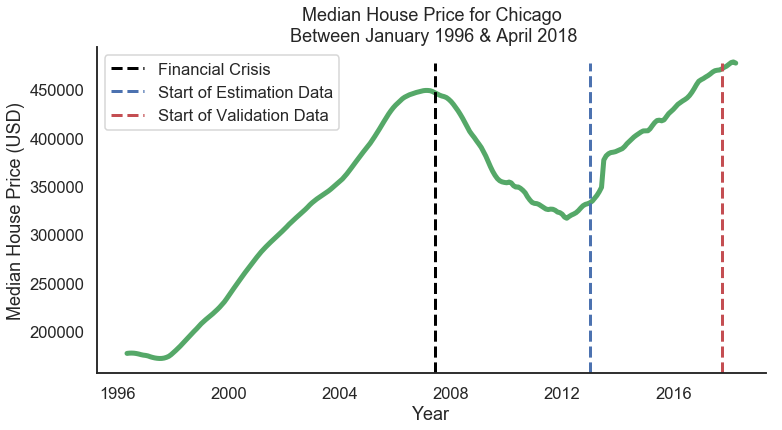

In [221]:
# set figuresize and style
sns.set(rc={'figure.figsize':(12,6)},style="white", context="talk")

# plot
ax = sns.lineplot('date', 'mean', data=zillow_chicago_mean, color='g', lw=5);

# Formatting
    # Title
title = 'Median House Price for Chicago\n Between January 1996 & April 2018'
ax.set_title(title)
    # Axis labels
xlabel = 'Year'
ylabel = "Median House Price (USD)"
ax.set(xlabel=xlabel, ylabel=ylabel)

# Insert Vertical Line for financial crisis
ax.axvline(x='2007-06', ymin=0, ymax=0.95, ls= "--", lw=3, color='black', label='Financial Crisis')

# Estimation period
    # Vertical Line for start
ax.axvline(x='2013', ymin=0, ymax=0.95, ls= "--", lw=3, color='b', label='Start of Estimation Data')

# Validation Period
    # Vertical Line for start
ax.axvline(x='2017-10', ymin=0, ymax=0.95, ls= "--", lw=3, color='r', label='Start of Validation Data')

# Take off the border
sns.despine()

# show legend
plt.legend();

In [168]:
# Make 2 DFs
temp_dict = {'A': [1,2,3,4], 'B': [6,14,8,9]}
temp_dfA  = pd.DataFrame(temp_dict['A'])
temp_dfB  = pd.DataFrame(temp_dict['B'])

# Put B next to A in 1 DF
temp_dfA_B = pd.concat([temp_dfA,temp_dfB], axis=1)
temp_dfA_B.columns = ['A', 'B']
temp_dfA_B

,A,B
0,1,6
1,2,14
2,3,8
3,4,9


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


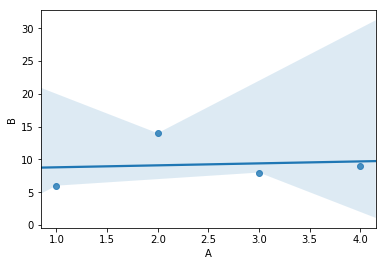

In [169]:
# sns.scatterplot(data=temp_dfA_B)
sns.regplot('A', 'B', data=temp_dfA_B);

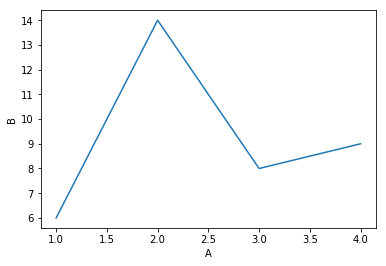

In [170]:
sns.lineplot('A', 'B', data=temp_dfA_B)